### NIM         : 2201741971 / 2401822232
### Name        : Edward
### Class       : LTY2
### Course      : Selected Topics in Computational Intelligence II
### Course Code : COMP8039041
### Source    : https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [1]:
from numpy.random import randint
from numpy.random import rand
from matplotlib import pyplot

In [2]:
# objective function
def objective(x):
	return 5.0*x[0]**2-(1.0-x[0])**2-5.0

In [3]:
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		# convert string to integer
		integer = int(chars, 2)
		# scale integer to desired range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# store
		decoded.append(value)
	return decoded

In [4]:
# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

In [5]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

In [6]:
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

In [7]:
# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	score_plot = list()
  # enumerate generations
	for gen in range(n_iter):
    # decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluate all candidates in the population
		scores = [objective(d) for d in decoded]
		print(">%d, best f(%s) = %f" % (gen,  decoded[gen], scores[gen]))
    # check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				score_plot.append(best_eval)
				print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval,score_plot]

In [19]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [20]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.634185791015625]) = -5.659605
>0, new best f([-0.443145751953125]) = -6.100779
>0, new best f([-0.063568115234375]) = -6.110973
>0, new best f([-0.183502197265625]) = -6.232312
>0, new best f([-0.2843017578125]) = -6.245294
>0, new best f([-0.240875244140625]) = -6.249667
>1, best f([-0.621917724609375]) = -5.696709
>1, new best f([-0.240936279296875]) = -6.249671
>2, best f([-0.38873291015625]) = -6.173013
>2, new best f([-0.241607666015625]) = -6.249718
>2, new best f([-0.2462158203125]) = -6.249943
>3, best f([-0.86602783203125]) = -4.732039
>3, new best f([-0.24627685546875]) = -6.249945
>3, new best f([-0.252960205078125]) = -6.249965
>4, best f([-0.238800048828125]) = -6.249498
>4, new best f([-0.2481689453125]) = -6.249987
>5, best f([0.764068603515625]) = -2.136659
>5, new best f([-0.24957275390625]) = -6.249999
>6, best f([-0.27032470703125]) = -6.248348
>6, new best f([-0.249847412109375]) = -6.250000
>7, best f([-0.2254638671875]) = -6.247592
>8, best f([-0.37

In [21]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [30]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 200
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [31]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([0.36126708984375]) = -4.755410
>0, new best f([-0.789764404296875]) = -5.084618
>0, new best f([-0.610687255859375]) = -5.729619
>0, new best f([-0.51177978515625]) = -5.975885
>0, new best f([-0.474517822265625]) = -6.048367
>0, new best f([-0.317169189453125]) = -6.231953
>0, new best f([-0.298980712890625]) = -6.240404
>0, new best f([-0.24151611328125]) = -6.249712
>0, new best f([-0.247344970703125]) = -6.249972
>0, new best f([-0.24957275390625]) = -6.249999
>1, best f([-0.49041748046875]) = -6.018798
>2, best f([-0.145843505859375]) = -6.206606
>2, new best f([-0.25030517578125]) = -6.250000
>3, best f([-0.47161865234375]) = -6.053541
>3, new best f([-0.249969482421875]) = -6.250000
>4, best f([-0.253448486328125]) = -6.249952
>5, best f([-0.2706298828125]) = -6.248298
>6, best f([0.9942626953125]) = -0.057241
>7, best f([-0.257843017578125]) = -6.249754
>7, new best f([-0.25]) = -6.250000
>8, best f([-0.251953125]) = -6.249985
>9, best f([-0.24920654296875]) = -6.24

In [32]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [33]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 300
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [34]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.500823974609375]) = -5.998349
>0, new best f([-0.069488525390625]) = -6.119662
>0, new best f([-0.372894287109375]) = -6.189588
>0, new best f([-0.163238525390625]) = -6.219890
>0, new best f([-0.191680908203125]) = -6.236396
>0, new best f([-0.263092041015625]) = -6.249314
>0, new best f([-0.25823974609375]) = -6.249728
>0, new best f([-0.252288818359375]) = -6.249979
>1, best f([-0.5689697265625]) = -5.843033
>2, best f([-0.189208984375]) = -6.235218
>2, new best f([-0.248626708984375]) = -6.249992
>3, best f([-0.25506591796875]) = -6.249897
>3, new best f([-0.25030517578125]) = -6.250000
>4, best f([0.71044921875]) = -2.560149
>4, new best f([-0.249725341796875]) = -6.250000
>5, best f([-0.235504150390625]) = -6.249159
>5, new best f([-0.250244140625]) = -6.250000
>6, best f([-0.246673583984375]) = -6.249956
>6, new best f([-0.250152587890625]) = -6.250000
>7, best f([-0.264007568359375]) = -6.249215
>8, best f([-0.25506591796875]) = -6.249897
>8, new best f([-0.25012

In [35]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.250030517578125]) = -6.250000


In [36]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [37]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.653076171875]) = -5.600118
>0, new best f([-0.569549560546875]) = -5.841552
>0, new best f([-0.408355712890625]) = -6.149694
>0, new best f([-0.280731201171875]) = -6.246222
>0, new best f([-0.25048828125]) = -6.249999
>1, best f([-0.573089599609375]) = -5.832452
>1, new best f([-0.25018310546875]) = -6.250000
>2, best f([-0.6580810546875]) = -5.583879
>3, best f([-0.291961669921875]) = -6.242957
>4, best f([-0.182037353515625]) = -6.231524
>5, best f([-0.34613037109375]) = -6.213036
>6, best f([-0.254730224609375]) = -6.249910
>7, best f([-0.228485107421875]) = -6.248148
>7, new best f([-0.2501220703125]) = -6.250000
>8, best f([-0.25531005859375]) = -6.249887
>9, best f([-0.25048828125]) = -6.249999
>9, new best f([-0.24993896484375]) = -6.250000
>10, best f([-0.252593994140625]) = -6.249973
>10, new best f([-0.250030517578125]) = -6.250000
>11, best f([-0.2384033203125]) = -6.249462
>12, best f([-0.250457763671875]) = -6.249999
>13, best f([-0.2822265625]) = -6.245846

In [38]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.250030517578125]) = -6.250000


In [42]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 200
# bits per variable
n_bits = 16
# define the population size
n_pop = 200
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [43]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([0.866455078125]) = -1.264112
>0, new best f([0.248321533203125]) = -5.256703
>0, new best f([-0.487030029296875]) = -6.025267
>0, new best f([-0.1690673828125]) = -6.223800
>0, new best f([-0.29071044921875]) = -6.243371
>0, new best f([-0.288665771484375]) = -6.244020
>0, new best f([-0.256195068359375]) = -6.249846
>1, best f([0.165496826171875]) = -5.559450
>2, best f([-0.820068359375]) = -4.950088
>2, new best f([-0.253509521484375]) = -6.249951
>2, new best f([-0.246612548828125]) = -6.249954
>2, new best f([-0.2501220703125]) = -6.250000
>3, best f([-0.097686767578125]) = -6.157203
>4, best f([-0.7896728515625]) = -5.085013
>5, best f([-0.382110595703125]) = -6.180187
>6, best f([-0.272705078125]) = -6.247938
>7, best f([-0.381134033203125]) = -6.181215
>8, best f([-0.0076904296875]) = -6.015144
>8, new best f([-0.25006103515625]) = -6.250000
>9, best f([-0.313079833984375]) = -6.234084
>10, best f([-0.257781982421875]) = -6.249758
>10, new best f([-0.250030517578125]

>179, best f([-0.251861572265625]) = -6.249986
>180, best f([-0.31256103515625]) = -6.234344
>181, best f([-0.250274658203125]) = -6.250000
>182, best f([-0.250518798828125]) = -6.249999
>183, best f([-0.2587890625]) = -6.249691
>184, best f([-0.25054931640625]) = -6.249999
>185, best f([-0.250030517578125]) = -6.250000
>186, best f([-0.2520751953125]) = -6.249983
>187, best f([-3.0517578125e-05]) = -6.000061
>188, best f([-0.25006103515625]) = -6.250000
>189, best f([-0.250030517578125]) = -6.250000
>190, best f([-0.251190185546875]) = -6.249994
>191, best f([-0.250030517578125]) = -6.250000
>192, best f([-0.281402587890625]) = -6.246056
>193, best f([-0.375091552734375]) = -6.187408
>194, best f([-0.25396728515625]) = -6.249937
>195, best f([-0.375030517578125]) = -6.187469
>196, best f([-0.250152587890625]) = -6.250000
>197, best f([-0.255889892578125]) = -6.249861
>198, best f([-0.265655517578125]) = -6.249020
>199, best f([-0.250091552734375]) = -6.250000
Done!


In [44]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.250030517578125]) = -6.250000


In [45]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 200
# bits per variable
n_bits = 16
# define the population size
n_pop = 300
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [46]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.74151611328125]) = -5.283648
>0, new best f([0.07965087890625]) = -5.815321
>0, new best f([-0.56640625]) = -5.849548
>0, new best f([-0.39288330078125]) = -6.168337
>0, new best f([-0.145965576171875]) = -6.206707
>0, new best f([-0.29913330078125]) = -6.240344
>0, new best f([-0.269256591796875]) = -6.248517
>0, new best f([-0.24908447265625]) = -6.249997
>1, best f([-0.0145263671875]) = -6.028209
>1, new best f([-0.249664306640625]) = -6.250000
>2, best f([-0.2425537109375]) = -6.249778
>2, new best f([-0.249969482421875]) = -6.250000
>3, best f([-0.28167724609375]) = -6.245986
>4, best f([-0.26312255859375]) = -6.249311
>5, best f([0.7745361328125]) = -2.051303
>6, best f([-0.25286865234375]) = -6.249967
>6, new best f([-0.25]) = -6.250000
>7, best f([-0.22369384765625]) = -6.247232
>8, best f([-0.23333740234375]) = -6.248889
>9, best f([-0.251129150390625]) = -6.249995
>10, best f([-0.249420166015625]) = -6.249999
>11, best f([-0.17437744140625]) = -6.227125
>12, be

>192, best f([-0.499267578125]) = -6.001463
>193, best f([-0.249908447265625]) = -6.250000
>194, best f([-0.46868896484375]) = -6.058701
>195, best f([-0.23431396484375]) = -6.249016
>196, best f([-0.71844482421875]) = -5.372238
>197, best f([-0.1851806640625]) = -6.233194
>198, best f([-0.07757568359375]) = -6.131079
>199, best f([-0.23773193359375]) = -6.249398
Done!


In [47]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [48]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 200
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [49]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.54400634765625]) = -5.904241
>0, new best f([-0.023193359375]) = -6.044235
>0, new best f([-0.14111328125]) = -6.202575
>0, new best f([-0.321807861328125]) = -6.229375
>0, new best f([-0.183013916015625]) = -6.232051
>0, new best f([-0.3026123046875]) = -6.238928
>0, new best f([-0.281005859375]) = -6.246155
>0, new best f([-0.229248046875]) = -6.248277
>0, new best f([-0.259307861328125]) = -6.249653
>0, new best f([-0.251861572265625]) = -6.249986
>0, new best f([-0.25030517578125]) = -6.250000
>1, best f([0.306243896484375]) = -5.012371
>1, new best f([-0.249725341796875]) = -6.250000
>2, best f([-0.3675537109375]) = -6.194725
>3, best f([-0.229339599609375]) = -6.248293
>4, best f([-0.312774658203125]) = -6.234237
>4, new best f([-0.24981689453125]) = -6.250000
>5, best f([-0.2716064453125]) = -6.248133
>5, new best f([-0.250152587890625]) = -6.250000
>6, best f([-0.4775390625]) = -6.042904
>6, new best f([-0.24993896484375]) = -6.250000
>7, best f([-0.15869140625])

>172, best f([-0.250030517578125]) = -6.250000
>173, best f([0.749969482421875]) = -2.250244
>174, best f([0.748016357421875]) = -2.265853
>175, best f([-0.250091552734375]) = -6.250000
>176, best f([-0.25030517578125]) = -6.250000
>177, best f([-0.336029052734375]) = -6.220396
>178, best f([-0.312774658203125]) = -6.234237
>179, best f([-0.250091552734375]) = -6.250000
>180, best f([-0.250274658203125]) = -6.250000
>181, best f([-0.312774658203125]) = -6.234237
>182, best f([-0.2501220703125]) = -6.250000
>183, best f([-0.250030517578125]) = -6.250000
>184, best f([-0.250457763671875]) = -6.249999
>185, best f([-0.25006103515625]) = -6.250000
>186, best f([-0.251068115234375]) = -6.249995
>187, best f([-0.250152587890625]) = -6.250000
>188, best f([-0.250030517578125]) = -6.250000
>189, best f([-0.312530517578125]) = -6.234360
>190, best f([-0.062591552734375]) = -6.109512
>191, best f([-0.156524658203125]) = -6.215049
>192, best f([-0.25018310546875]) = -6.250000
>193, best f([-0.250

In [57]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 300
# bits per variable
n_bits = 16
# define the population size
n_pop = 300
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [58]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([0.084136962890625]) = -5.803410
>0, new best f([-0.268890380859375]) = -6.248573
>0, new best f([-0.264404296875]) = -6.249170
>0, new best f([-0.259765625]) = -6.249619
>1, best f([-0.273345947265625]) = -6.247820
>1, new best f([-0.2587890625]) = -6.249691
>1, new best f([-0.242156982421875]) = -6.249754
>2, best f([-0.091278076171875]) = -6.149229
>2, new best f([-0.2431640625]) = -6.249813
>2, new best f([-0.244598388671875]) = -6.249883
>2, new best f([-0.24945068359375]) = -6.249999
>3, best f([-0.873443603515625]) = -4.695272
>3, new best f([-0.24951171875]) = -6.249999
>4, best f([-0.336883544921875]) = -6.219805
>4, new best f([-0.24981689453125]) = -6.250000
>4, new best f([-0.250030517578125]) = -6.250000
>5, best f([-0.247589111328125]) = -6.249977
>6, best f([-0.207794189453125]) = -6.242875
>7, best f([-0.27587890625]) = -6.247321
>8, best f([-0.118072509765625]) = -6.180381
>9, best f([-0.2523193359375]) = -6.249978
>10, best f([-0.343658447265625]) = -6.2149

>174, best f([-0.251983642578125]) = -6.249984
>175, best f([-0.375030517578125]) = -6.187469
>176, best f([-0.250274658203125]) = -6.250000
>177, best f([0.734344482421875]) = -2.374264
>178, best f([-0.250701904296875]) = -6.249998
>179, best f([-0.250946044921875]) = -6.249996
>180, best f([-0.26080322265625]) = -6.249533
>181, best f([0.749481201171875]) = -2.254149
>182, best f([-0.253936767578125]) = -6.249938
>183, best f([-0.250030517578125]) = -6.250000
>184, best f([-0.269805908203125]) = -6.248431
>185, best f([-0.250152587890625]) = -6.250000
>186, best f([-0.250030517578125]) = -6.250000
>187, best f([-0.25250244140625]) = -6.249975
>188, best f([-0.285247802734375]) = -6.245030
>189, best f([-0.312744140625]) = -6.234253
>190, best f([-0.750091552734375]) = -5.249634
>191, best f([0.671844482421875]) = -2.850811
>192, best f([-0.257843017578125]) = -6.249754
>193, best f([-0.28228759765625]) = -6.245830
>194, best f([-0.253936767578125]) = -6.249938
>195, best f([-0.28128

In [59]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [60]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 300
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [61]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.4473876953125]) = -6.094152
>0, new best f([-0.157379150390625]) = -6.215686
>0, new best f([-0.170318603515625]) = -6.224604
>0, new best f([-0.22308349609375]) = -6.247102
>0, new best f([-0.244903564453125]) = -6.249896
>0, new best f([-0.25177001953125]) = -6.249987
>1, best f([-0.29840087890625]) = -6.240629
>1, new best f([-0.24951171875]) = -6.249999
>2, best f([0.010986328125]) = -5.977545
>3, best f([-0.374664306640625]) = -6.187835
>3, new best f([-0.250091552734375]) = -6.250000
>4, best f([-0.100860595703125]) = -6.161030
>4, new best f([-0.25]) = -6.250000
>5, best f([-0.21063232421875]) = -6.243801
>6, best f([-0.483917236328125]) = -6.031131
>7, best f([-0.241943359375]) = -6.249740
>8, best f([-0.245880126953125]) = -6.249932
>9, best f([-0.12384033203125]) = -6.186335
>10, best f([-0.248931884765625]) = -6.249995
>11, best f([-0.238372802734375]) = -6.249459
>12, best f([-0.248138427734375]) = -6.249986
>13, best f([-0.4984130859375]) = -6.003164
>14, be

>193, best f([-0.249755859375]) = -6.250000
>194, best f([-0.246063232421875]) = -6.249938
>195, best f([-0.248016357421875]) = -6.249984
>196, best f([-0.8983154296875]) = -4.568748
>197, best f([-0.187255859375]) = -6.234253
>198, best f([-0.249969482421875]) = -6.250000
>199, best f([-0.125]) = -6.187500
>200, best f([-0.21697998046875]) = -6.245639
>201, best f([-0.245941162109375]) = -6.249934
>202, best f([-0.217529296875]) = -6.245783
>203, best f([-0.491973876953125]) = -6.015795
>204, best f([-0.749755859375]) = -5.250976
>205, best f([-0.24945068359375]) = -6.249999
>206, best f([-0.25]) = -6.250000
>207, best f([-0.187469482421875]) = -6.234360
>208, best f([-0.24847412109375]) = -6.249991
>209, best f([-0.249755859375]) = -6.250000
>210, best f([-0.124603271484375]) = -6.187103
>211, best f([-0.216461181640625]) = -6.245501
>212, best f([-0.234375]) = -6.249023
>213, best f([-0.249969482421875]) = -6.250000
>214, best f([-0.249847412109375]) = -6.250000
>215, best f([-0.749

In [62]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [75]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 400
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [76]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.9052734375]) = -4.532467
>0, new best f([0.33233642578125]) = -4.893537
>0, new best f([0.13818359375]) = -5.647254
>0, new best f([-0.46356201171875]) = -6.067565
>0, new best f([-0.332855224609375]) = -6.222540
>0, new best f([-0.316802978515625]) = -6.232149
>0, new best f([-0.260833740234375]) = -6.249531
>0, new best f([-0.252838134765625]) = -6.249968
>0, new best f([-0.25152587890625]) = -6.249991
>1, best f([0.247222900390625]) = -5.261078
>1, new best f([-0.25103759765625]) = -6.249996
>1, new best f([-0.24920654296875]) = -6.249997
>2, best f([-0.428955078125]) = -6.121900
>3, best f([-0.1903076171875]) = -6.235747
>3, new best f([-0.249664306640625]) = -6.250000
>4, best f([-0.337249755859375]) = -6.219550
>4, new best f([-0.249786376953125]) = -6.250000
>5, best f([-0.25262451171875]) = -6.249972
>5, new best f([-0.250152587890625]) = -6.250000
>5, new best f([-0.250091552734375]) = -6.250000
>6, best f([-0.26214599609375]) = -6.249410
>7, best f([-0.26141357

>164, best f([-0.25067138671875]) = -6.249998
>165, best f([0.749969482421875]) = -2.250244
>166, best f([-0.25152587890625]) = -6.249991
>167, best f([-0.25213623046875]) = -6.249982
>168, best f([-9.1552734375e-05]) = -6.000183
>169, best f([-0.257904052734375]) = -6.249750
>170, best f([-0.25250244140625]) = -6.249975
>171, best f([-0.250091552734375]) = -6.250000
>172, best f([-0.296905517578125]) = -6.241199
>173, best f([-0.25006103515625]) = -6.250000
>174, best f([-0.750885009765625]) = -5.246457
>175, best f([-0.251220703125]) = -6.249994
>176, best f([-0.25006103515625]) = -6.250000
>177, best f([-0.25006103515625]) = -6.250000
>178, best f([-0.25103759765625]) = -6.249996
>179, best f([-0.250274658203125]) = -6.250000
>180, best f([-0.250030517578125]) = -6.250000
>181, best f([-0.266632080078125]) = -6.248893
>182, best f([-0.25006103515625]) = -6.250000
>183, best f([-0.250091552734375]) = -6.250000
>184, best f([-0.2523193359375]) = -6.249978
>185, best f([-0.253936767578

>359, best f([-0.062530517578125]) = -6.109421
>360, best f([-0.2579345703125]) = -6.249748
>361, best f([-0.37518310546875]) = -6.187317
>362, best f([-0.406280517578125]) = -6.152306
>363, best f([-0.251983642578125]) = -6.249984
>364, best f([-0.31268310546875]) = -6.234283
>365, best f([-0.25048828125]) = -6.249999
>366, best f([-0.25006103515625]) = -6.250000
>367, best f([-0.314727783203125]) = -6.233241
>368, best f([-0.500030517578125]) = -5.999939
>369, best f([-0.250518798828125]) = -6.249999
>370, best f([-0.2523193359375]) = -6.249978
>371, best f([-0.383331298828125]) = -6.178891
>372, best f([-0.25830078125]) = -6.249724
>373, best f([-0.25006103515625]) = -6.250000
>374, best f([-0.25885009765625]) = -6.249687
>375, best f([-0.250030517578125]) = -6.250000
>376, best f([-0.3751220703125]) = -6.187378
>377, best f([-0.252471923828125]) = -6.249976
>378, best f([-0.750030517578125]) = -5.249878
>379, best f([-0.250030517578125]) = -6.250000
>380, best f([0.997039794921875]

In [77]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [89]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [90]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([1.99627685546875]) = 13.933039
>0, new best f([-0.87640380859375]) = -4.680473
>0, new best f([-0.05517578125]) = -6.098174
>0, new best f([-0.0908203125]) = -6.148647
>0, new best f([-0.3707275390625]) = -6.191699
>0, new best f([-0.34869384765625]) = -6.211038
>1, best f([-0.94903564453125]) = -4.295397
>1, new best f([-0.34063720703125]) = -6.217140
>1, new best f([-0.22900390625]) = -6.248237
>2, best f([-0.4857177734375]) = -6.027749
>2, new best f([-0.24420166015625]) = -6.249866
>3, best f([-0.11553955078125]) = -6.177682
>3, new best f([-0.24560546875]) = -6.249923
>3, new best f([-0.24676513671875]) = -6.249958
>3, new best f([-0.25164794921875]) = -6.249989
>4, best f([-1.432861328125]) = -0.653356
>4, new best f([-0.25152587890625]) = -6.249991
>5, best f([-0.33465576171875]) = -6.221334
>6, best f([-0.6424560546875]) = -5.633913
>7, best f([-0.28387451171875]) = -6.245410
>7, new best f([-0.24896240234375]) = -6.249996
>8, best f([-0.0687255859375]) = -6.118558


In [91]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [92]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 200
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [93]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([0.73101806640625]) = -2.400414
>0, new best f([-0.76153564453125]) = -5.203325
>0, new best f([-0.1187744140625]) = -6.181119
>0, new best f([-0.31231689453125]) = -6.234466
>0, new best f([-0.294677734375]) = -6.242016
>0, new best f([-0.2459716796875]) = -6.249935
>1, best f([-0.10845947265625]) = -6.169865
>2, best f([-0.72576904296875]) = -5.344575
>3, best f([-1.66448974609375]) = 1.753125
>3, new best f([-0.25396728515625]) = -6.249937
>4, best f([-0.23504638671875]) = -6.249106
>5, best f([-0.34844970703125]) = -6.211231
>5, new best f([-0.24609375]) = -6.249939
>6, best f([-0.23468017578125]) = -6.249061
>6, new best f([-0.251708984375]) = -6.249988
>7, best f([-0.281982421875]) = -6.245908
>7, new best f([-0.24920654296875]) = -6.249997
>8, best f([-0.75714111328125]) = -5.221232
>9, best f([-0.12225341796875]) = -6.184723
>9, new best f([-0.2496337890625]) = -6.249999
>10, best f([-0.24359130859375]) = -6.249836
>10, new best f([-0.249755859375]) = -6.250000
>11, 

In [94]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [95]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 300
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [96]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-1.62176513671875]) = 1.276958
>0, new best f([0.8114013671875]) = -1.743709
>0, new best f([-0.09698486328125]) = -6.156345
>0, new best f([-0.10137939453125]) = -6.161648
>0, new best f([-0.34271240234375]) = -6.215618
>0, new best f([-0.33758544921875]) = -6.219315
>0, new best f([-0.1912841796875]) = -6.236210
>0, new best f([-0.19525146484375]) = -6.238010
>0, new best f([-0.27490234375]) = -6.247519
>1, best f([0.52032470703125]) = -3.876399
>1, new best f([-0.24786376953125]) = -6.249982
>2, best f([-0.30999755859375]) = -6.235601
>2, new best f([-0.24957275390625]) = -6.249999
>3, best f([-0.44000244140625]) = -6.105596
>3, new best f([-0.2501220703125]) = -6.250000
>4, best f([-0.219482421875]) = -6.246275
>4, new best f([-0.25006103515625]) = -6.250000
>5, best f([-0.2841796875]) = -6.245327
>6, best f([-0.27783203125]) = -6.246902
>7, best f([-0.25384521484375]) = -6.249941
>8, best f([-0.30828857421875]) = -6.236410
>9, best f([-0.232421875]) = -6.248764
>10, be

In [97]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25006103515625]) = -6.250000


In [98]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [99]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([1.80963134765625]) = 10.718325
>0, new best f([0.84820556640625]) = -1.425778
>0, new best f([-0.6702880859375]) = -5.543432
>0, new best f([-0.153076171875]) = -6.212423
>0, new best f([-0.1990966796875]) = -6.239635
>0, new best f([-0.2723388671875]) = -6.248004
>0, new best f([-0.23553466796875]) = -6.249163
>0, new best f([-0.23992919921875]) = -6.249594
>0, new best f([-0.25433349609375]) = -6.249925
>1, best f([-0.96734619140625]) = -4.191658
>2, best f([-0.4498291015625]) = -6.090273
>2, new best f([-0.25048828125]) = -6.249999
>3, best f([1.64935302734375]) = 8.180168
>4, best f([-0.368408203125]) = -6.193918
>4, new best f([-0.25030517578125]) = -6.250000
>5, best f([-0.19140625]) = -6.236267
>5, new best f([-0.24993896484375]) = -6.250000
>6, best f([-0.1988525390625]) = -6.239536
>7, best f([-1.37255859375]) = -1.209449
>7, new best f([-0.25]) = -6.250000
>8, best f([-0.269287109375]) = -6.248512
>9, best f([-1.25616455078125]) = -2.200532
>10, best f([-0.2790527

In [100]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [101]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 200
# bits per variable
n_bits = 16
# define the population size
n_pop = 200
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [102]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([0.32122802734375]) = -4.944794
>0, new best f([-0.1435546875]) = -6.204678
>0, new best f([-0.2977294921875]) = -6.240888
>0, new best f([-0.22882080078125]) = -6.248206
>0, new best f([-0.27099609375]) = -6.248237
>1, best f([-0.1435546875]) = -6.204678
>1, new best f([-0.267822265625]) = -6.248729
>1, new best f([-0.2325439453125]) = -6.248781
>2, best f([-0.10247802734375]) = -6.162949
>2, new best f([-0.2535400390625]) = -6.249950
>3, best f([1.718017578125]) = 9.242373
>3, new best f([-0.2520751953125]) = -6.249983
>4, best f([-0.12261962890625]) = -6.185097
>4, new best f([-0.250244140625]) = -6.250000
>5, best f([-1.19183349609375]) = -2.701799
>6, best f([1.765625]) = 10.000977
>7, best f([-0.3399658203125]) = -6.217625
>7, new best f([-0.25018310546875]) = -6.250000
>7, new best f([-0.25]) = -6.250000
>8, best f([-1.25396728515625]) = -2.218199
>9, best f([-1.228515625]) = -2.420029
>10, best f([-0.26995849609375]) = -6.248407
>11, best f([-0.0604248046875]) = -6.1

In [103]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [104]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 200
# bits per variable
n_bits = 16
# define the population size
n_pop = 300
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [105]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([1.69830322265625]) = 8.933542
>0, new best f([-1.302490234375]) = -1.819057
>0, new best f([-0.367431640625]) = -6.194839
>0, new best f([-0.314453125]) = -6.233383
>0, new best f([-0.278076171875]) = -6.246847
>0, new best f([-0.2591552734375]) = -6.249665
>0, new best f([-0.24609375]) = -6.249939
>1, best f([-0.0548095703125]) = -6.097603
>2, best f([-0.080078125]) = -6.134506
>3, best f([0.71832275390625]) = -2.499404
>3, new best f([-0.2496337890625]) = -6.249999
>4, best f([-0.30621337890625]) = -6.237360
>4, new best f([-0.24993896484375]) = -6.250000
>5, best f([1.69622802734375]) = 8.901214
>6, best f([1.7852783203125]) = 10.319431
>7, best f([-0.2359619140625]) = -6.249212
>8, best f([-0.37451171875]) = -6.187987
>8, new best f([-0.25]) = -6.250000
>9, best f([-0.2142333984375]) = -6.244883
>10, best f([-0.119140625]) = -6.181503
>11, best f([-0.2484130859375]) = -6.249990
>12, best f([-0.22930908203125]) = -6.248288
>13, best f([-0.67657470703125]) = -5.522136
>14

In [106]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [107]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 200
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [108]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([0.68023681640625]) = -2.788638
>0, new best f([0.103271484375]) = -5.750797
>0, new best f([-0.19317626953125]) = -6.237084
>0, new best f([-0.28314208984375]) = -6.245606
>0, new best f([-0.22216796875]) = -6.246902
>0, new best f([-0.270751953125]) = -6.248277
>1, best f([-1.138916015625]) = -3.089313
>1, new best f([-0.256103515625]) = -6.249851
>1, new best f([-0.25201416015625]) = -6.249984
>2, best f([-0.28143310546875]) = -6.246048
>2, new best f([-0.25042724609375]) = -6.249999
>3, best f([-0.24249267578125]) = -6.249775
>4, best f([-0.35589599609375]) = -6.205144
>4, new best f([-0.25018310546875]) = -6.250000
>4, new best f([-0.25006103515625]) = -6.250000
>5, best f([-0.07257080078125]) = -6.124076
>6, best f([-0.2354736328125]) = -6.249156
>7, best f([-0.3023681640625]) = -6.239030
>8, best f([-0.261962890625]) = -6.249428
>9, best f([-0.140380859375]) = -6.201935
>10, best f([-0.2532958984375]) = -6.249957
>11, best f([-0.2513427734375]) = -6.249993
>12, best f

>174, best f([-0.25640869140625]) = -6.249836
>175, best f([-0.26629638671875]) = -6.248938
>176, best f([-0.25067138671875]) = -6.249998
>177, best f([-0.25787353515625]) = -6.249752
>178, best f([-0.25042724609375]) = -6.249999
>179, best f([-0.25909423828125]) = -6.249669
>180, best f([-0.25323486328125]) = -6.249958
>181, best f([-0.251220703125]) = -6.249994
>182, best f([-0.28179931640625]) = -6.245955
>183, best f([-1.75030517578125]) = 2.753662
>184, best f([-1.25054931640625]) = -2.245604
>185, best f([1.74176025390625]) = 9.618436
>186, best f([-0.2515869140625]) = -6.249990
>187, best f([-0.25030517578125]) = -6.250000
>188, best f([-0.26202392578125]) = -6.249422
>189, best f([-1.2506103515625]) = -2.245116
>190, best f([-0.0235595703125]) = -6.044899
>191, best f([-0.2506103515625]) = -6.249999
>192, best f([-0.25140380859375]) = -6.249992
>193, best f([0.999755859375]) = -0.002441
>194, best f([-0.25006103515625]) = -6.250000
>195, best f([-0.25042724609375]) = -6.249999


In [109]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [110]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 300
# bits per variable
n_bits = 16
# define the population size
n_pop = 300
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [111]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.42041015625]) = -6.133842
>0, new best f([-0.15570068359375]) = -6.214431
>0, new best f([-0.240234375]) = -6.249619
>1, best f([-0.20135498046875]) = -6.240535
>1, new best f([-0.2578125]) = -6.249756
>1, new best f([-0.24560546875]) = -6.249923
>1, new best f([-0.2469482421875]) = -6.249963
>2, best f([-0.1553955078125]) = -6.214200
>2, new best f([-0.24725341796875]) = -6.249970
>3, best f([-0.1590576171875]) = -6.216918
>3, new best f([-0.248291015625]) = -6.249988
>3, new best f([-0.25030517578125]) = -6.250000
>4, best f([-0.267578125]) = -6.248764
>5, best f([-0.21502685546875]) = -6.245108
>6, best f([-0.74871826171875]) = -5.255120
>6, new best f([-0.25]) = -6.250000
>7, best f([-0.1265869140625]) = -6.189077
>8, best f([-0.2484130859375]) = -6.249990
>9, best f([-1.2431640625]) = -2.304501
>10, best f([1.8897705078125]) = 12.064471
>11, best f([-0.1617431640625]) = -6.218843
>12, best f([-0.2379150390625]) = -6.249416
>13, best f([-0.49072265625]) = -6.018210
>

>197, best f([-0.24951171875]) = -6.249999
>198, best f([-0.23388671875]) = -6.248961
>199, best f([-0.4996337890625]) = -6.000732
>200, best f([-0.49993896484375]) = -6.000122
>201, best f([-0.24591064453125]) = -6.249933
>202, best f([-0.21875]) = -6.246094
>203, best f([-0.24993896484375]) = -6.250000
>204, best f([-0.375]) = -6.187500
>205, best f([-0.2490234375]) = -6.249996
>206, best f([-0.2496337890625]) = -6.249999
>207, best f([-0.2186279296875]) = -6.246063
>208, best f([1.75115966796875]) = 9.768560
>209, best f([-0.5]) = -6.000000
>210, best f([1.25]) = 2.750000
>211, best f([-0.24560546875]) = -6.249923
>212, best f([-0.24951171875]) = -6.249999
>213, best f([-0.248046875]) = -6.249985
>214, best f([1.7529296875]) = 9.796909
>215, best f([-0.25]) = -6.250000
>216, best f([-0.25]) = -6.250000
>217, best f([-0.12298583984375]) = -6.185470
>218, best f([-0.49609375]) = -6.007751
>219, best f([-0.1865234375]) = -6.233883
>220, best f([-0.74993896484375]) = -5.250244
>221, bes

In [112]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [113]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 300
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [114]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([1.52362060546875]) = 6.332920
>0, new best f([1.1409912109375]) = 1.489426
>0, new best f([-1.39129638671875]) = -1.039770
>0, new best f([-0.502197265625]) = -5.995586
>0, new best f([-0.02691650390625]) = -6.050935
>0, new best f([-0.271728515625]) = -6.248111
>0, new best f([-0.264404296875]) = -6.249170
>1, best f([0.38226318359375]) = -4.650973
>1, new best f([-0.243408203125]) = -6.249826
>2, best f([-0.15338134765625]) = -6.212659
>2, new best f([-0.24658203125]) = -6.249953
>3, best f([-0.4267578125]) = -6.125027
>3, new best f([-0.24871826171875]) = -6.249993
>4, best f([-0.13525390625]) = -6.197333
>4, new best f([-0.24969482421875]) = -6.250000
>4, new best f([-0.24993896484375]) = -6.250000
>5, best f([-0.28228759765625]) = -6.245830
>6, best f([-0.38427734375]) = -6.177878
>7, best f([-0.3060302734375]) = -6.237442
>8, best f([-0.22711181640625]) = -6.247905
>9, best f([-0.25616455078125]) = -6.249848
>9, new best f([-0.25]) = -6.250000
>10, best f([-0.27880859

>176, best f([-0.26568603515625]) = -6.249016
>177, best f([-0.2513427734375]) = -6.249993
>178, best f([-0.25982666015625]) = -6.249614
>179, best f([-0.25140380859375]) = -6.249992
>180, best f([-0.25787353515625]) = -6.249752
>181, best f([-0.25054931640625]) = -6.249999
>182, best f([-0.7506103515625]) = -5.247557
>183, best f([-0.0003662109375]) = -6.000732
>184, best f([-0.25054931640625]) = -6.249999
>185, best f([-0.03216552734375]) = -6.060193
>186, best f([-0.25396728515625]) = -6.249937
>187, best f([-0.28143310546875]) = -6.246048
>188, best f([-0.25067138671875]) = -6.249998
>189, best f([-0.37506103515625]) = -6.187439
>190, best f([-0.25006103515625]) = -6.250000
>191, best f([-1.25006103515625]) = -2.249512
>192, best f([-0.2506103515625]) = -6.249999
>193, best f([-0.25030517578125]) = -6.250000
>194, best f([-0.75006103515625]) = -5.249756
>195, best f([-0.25006103515625]) = -6.250000
>196, best f([-0.25006103515625]) = -6.250000
>197, best f([-0.25006103515625]) = -6

In [115]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


In [116]:
# define range for input
bounds = [[-2.0, 2.0]]
# define the total iterations
n_iter = 400
# bits per variable
n_bits = 16
# define the population size
n_pop = 400
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [117]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.6014404296875]) = -5.755958
>0, new best f([-0.170654296875]) = -6.224817
>0, new best f([-0.20098876953125]) = -6.240392
>0, new best f([-0.2574462890625]) = -6.249778
>1, best f([-0.2509765625]) = -6.249996
>1, new best f([-0.2509765625]) = -6.249996
>2, best f([-1.25341796875]) = -2.222610
>2, new best f([-0.25006103515625]) = -6.250000
>3, best f([-0.83758544921875]) = -4.868973
>4, best f([-0.6396484375]) = -5.642696
>5, best f([-0.25848388671875]) = -6.249712
>5, new best f([-0.25]) = -6.250000
>6, best f([-0.27239990234375]) = -6.247993
>7, best f([-0.25]) = -6.250000
>8, best f([-0.991455078125]) = -4.050977
>9, best f([-0.2652587890625]) = -6.249069
>10, best f([-0.02020263671875]) = -6.038773
>11, best f([-0.184326171875]) = -6.232748
>12, best f([-0.251953125]) = -6.249985
>13, best f([-0.2506103515625]) = -6.249999
>14, best f([-0.7518310546875]) = -5.242662
>15, best f([-0.226806640625]) = -6.247848
>16, best f([-0.2503662109375]) = -6.249999
>17, best f([-0

>193, best f([-0.25054931640625]) = -6.249999
>194, best f([-0.25030517578125]) = -6.250000
>195, best f([-0.281982421875]) = -6.245908
>196, best f([-0.2501220703125]) = -6.250000
>197, best f([-0.2501220703125]) = -6.250000
>198, best f([-0.2503662109375]) = -6.249999
>199, best f([-0.250244140625]) = -6.250000
>200, best f([-0.25506591796875]) = -6.249897
>201, best f([-1.25396728515625]) = -2.218199
>202, best f([-0.25396728515625]) = -6.249937
>203, best f([-0.25006103515625]) = -6.250000
>204, best f([-0.0010986328125]) = -6.002192
>205, best f([-0.25054931640625]) = -6.249999
>206, best f([-0.25201416015625]) = -6.249984
>207, best f([-0.25213623046875]) = -6.249982
>208, best f([-0.25018310546875]) = -6.250000
>209, best f([-0.32818603515625]) = -6.225548
>210, best f([-0.25006103515625]) = -6.250000
>211, best f([-0.250244140625]) = -6.250000
>212, best f([-0.25048828125]) = -6.249999
>213, best f([-0.31280517578125]) = -6.234222
>214, best f([1.12451171875]) = 1.307130
>215, 

>392, best f([-0.25054931640625]) = -6.249999
>393, best f([-0.250244140625]) = -6.250000
>394, best f([-0.25079345703125]) = -6.249997
>395, best f([-0.250244140625]) = -6.250000
>396, best f([-0.3282470703125]) = -6.225510
>397, best f([-0.2501220703125]) = -6.250000
>398, best f([-0.2501220703125]) = -6.250000
>399, best f([-0.25408935546875]) = -6.249933
Done!


In [118]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


# BEST RESULT: ITERATION = 100, POP  = 100 & BOUNDS = [[-1.0, 1.0]]

In [120]:
# define range for input
bounds = [[-1.0, 1.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [121]:
# perform the genetic algorithm search
best, score, scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')

>0, best f([-0.167449951171875]) = -6.222742
>0, new best f([-0.266998291015625]) = -6.248844
>0, new best f([-0.233917236328125]) = -6.248965
>0, new best f([-0.258514404296875]) = -6.249710
>0, new best f([-0.254730224609375]) = -6.249910
>1, best f([0.0972900390625]) = -5.767559
>1, new best f([-0.2525634765625]) = -6.249974
>1, new best f([-0.2498779296875]) = -6.250000
>2, best f([-0.4842529296875]) = -6.030502
>3, best f([-0.29522705078125]) = -6.241818
>4, best f([-0.318603515625]) = -6.231174
>5, best f([0.7269287109375]) = -2.432441
>6, best f([-0.227081298828125]) = -6.247899
>6, new best f([-0.24993896484375]) = -6.250000
>7, best f([-0.262481689453125]) = -6.249377
>8, best f([-0.262847900390625]) = -6.249340
>9, best f([-0.493988037109375]) = -6.011879
>9, new best f([-0.249969482421875]) = -6.250000
>10, best f([-0.2430419921875]) = -6.249806
>10, new best f([-0.25]) = -6.250000
>11, best f([-0.255767822265625]) = -6.249867
>12, best f([-0.47064208984375]) = -6.055268
>13

In [122]:
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

f([-0.25]) = -6.250000


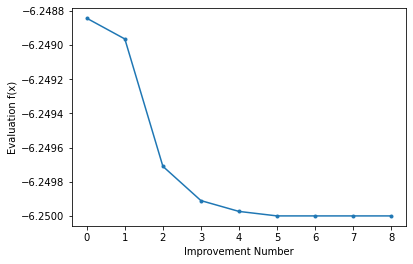

In [123]:
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()